# Stock Market Analysis Project

![](https://cdn-images-1.medium.com/fit/t/1600/480/1*veW_bUCkcsHZ32GMCVhyLA.png)

In [15]:
# Team members:
full_name_1 = "Heather Chen"
full_name_2 = "Phuong Nguyen"
full_name_3 = "Tiffany Wu"

In [29]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install hvplot

Note: you may need to restart the kernel to use updated packages.


In [35]:
# import all required libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf  
import requests
from bs4 import BeautifulSoup
import plotly.express as px
import plotly.graph_objects as po
from wordcloud import WordCloud
import hvplot.pandas

---
### yfinance library

You can use **yfinance** in your project for downloading data from yahoo finance website. For more information on **yfinance** library go to https://pypi.org/project/yfinance/.

The **download** method returns the prices in Panda dataframe format. The first row of the returned df is the prices of the start date, and the last row is the prices of one day before the end date. The end date is not included in the returned df. For all sections, you can assume the end date refers to one day before the end day (start date up to the end date, end date is not included). See the example below.

In [31]:
ticker = 'MSFT'
s_date = '2019-11-04'
e_date = '2019-11-07'

df = yf.download(ticker, s_date, e_date, progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-04,144.830002,145.000000,144.160004,144.550003,138.565262,16912000
2019-11-05,144.970001,145.020004,143.910004,144.460007,138.478973,18250200
2019-11-06,144.369995,144.520004,143.199997,144.059998,138.095551,16575800


---
## Part 1 - Stock Analysis: 

Write a Python statement that can generate a comprehensive report for a given stock. You can use any Python library for this part, but you must use at least **two** new libraries we have not covered in class. The report may generate the following information:
* The current stock price.
* The current market cap.
* Measures such as EPS, PE Ratio, etc.
* At least 3 informative graphs.
* Company Profile.
* Any other relative information such as news about the company.

Be creative and try to collect as much data as you can. Test your code for AAPL, MSFT, and JPM stocks.

**Note:** NumPy is not considered as a new library. You can webscape any website; however, you are not allowed to webscape the websites covered in class.

In [36]:
# Type the name of the new libraries you use here:
library1 = "plotly"
library2 = "hvplot"

In [37]:
def stock_analysis(company_name):
    url = f"https://stockanalysis.com/stocks/{company_name}/"

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    #Comprehensive report for a given stock
    #Company introduction
    introduction = soup.find('p', attrs={'data-test': 'overview-profile-description'}).text
    industry = soup.find_all('span', attrs={'class': 'block font-semibold'}, text='Industry')[0].next.next.next.next.text
    sector = soup.find_all('span', attrs={'class': 'block font-semibold'}, text='Sector')[0].next.next.next.text
    employee = soup.find_all('span', attrs={'class': 'block font-semibold'}, text='Employees')[0].next.next.next.text
    overview = (
        f"Company Introduction: {introduction}\n"
        f"Industry: {industry}\n"
        f"Sector: {sector}\n"
        f"Number of Employees: {employee}\n"
    )
    print(overview)
    
    #Financial Performance
    stock_price = soup.select_one('.text-4xl').text
    market_cap = soup.find_all('td', attrs={'class' : 'whitespace-nowrap px-0.5 py-[1px] xs:px-1 sm:py-2'}, text='Market Cap')[0].next.next.next.next.text
    eps = soup.find_all('td', attrs={'class' : 'whitespace-nowrap px-0.5 py-[1px] xs:px-1 sm:py-2'}, text='EPS (ttm)')[0].next.next.next.text
    pe_ratio = soup.find_all('td', attrs={'class' : 'whitespace-nowrap px-0.5 py-[1px] xs:px-1 sm:py-2'}, text='PE Ratio')[0].next.next.next.text
    market_vol = soup.find_all('td', attrs={'class' : 'whitespace-nowrap px-0.5 py-[1px] xs:px-1 sm:py-2'}, text='Volume')[0].next.next.next.text
    company_data = [[stock_price, market_cap, eps, pe_ratio, market_vol]]
    
    df = pd.DataFrame(company_data, columns=["Stock Price", "Market Cap", "Earning per Share", "Price to Earning", "Volume"])
    print(df)

    #Get and download the first news of the company
    stock = yf.Ticker(company_name)
    news = stock.news
    first_news_url = news[0].get('link')
    news_response = requests.get(first_news_url)
    news_soup = BeautifulSoup(news_response.text, 'html.parser')
    paragraphs = news_soup.find_all('p')
    news_content = ' '.join(paragraph.text for paragraph in paragraphs)

    # Generate the word cloud from the news content
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(news_content)
    wordcloud_file = f"{company_name}_wordcloud.png"
    wordcloud.to_file(wordcloud_file)

    #figure 1: Stock Prices Over the Last Year
    stock_data = yf.download(company_name, start='2023-01-01', end='2024-05-01')
    fig1 = px.line(stock_data, x=stock_data.index, y='Close',
                       labels={'x': 'Date', 'y': 'Closing Price ($)'},
                       title=f"Stock Prices Over the Last Year for {company_name}")
    fig1.show()

    #figure 2: OHLC Over the Last Year
    fig2 = po.Figure(data=[po.Ohlc(x=stock_data.index,
                                       open=stock_data['Open'],
                                       high=stock_data['High'],
                                       low=stock_data['Low'],
                                       close=stock_data['Close'])])
    fig2.update_layout(title=f"OHLC Over the Last Year for {company_name}")
    fig2.show()

    #fig 3
    data = yf.download(company_name, period='1d', interval='5m')
    fig3 = data.hvplot.line(
        x='Datetime',
        y='Close',
        xlabel='Time',
        ylabel='Close Price ($)',
        title=f'Intra-Day Stock Price for {company_name}')
    return fig3


In [38]:
stock_analysis('aapl')

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:9: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:10: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:11: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:22: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:23: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.

Company Introduction: Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, ... [Read more]
Industry: Consumer Electronics
Sector: Technology
Number of Employees: 161,000

  Stock Price Market Cap Earning per Share Price to Earning      Volume
0      183.05      2.81T              6.43            28.47  48,791,207


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


:Curve   [Datetime]   (Close)

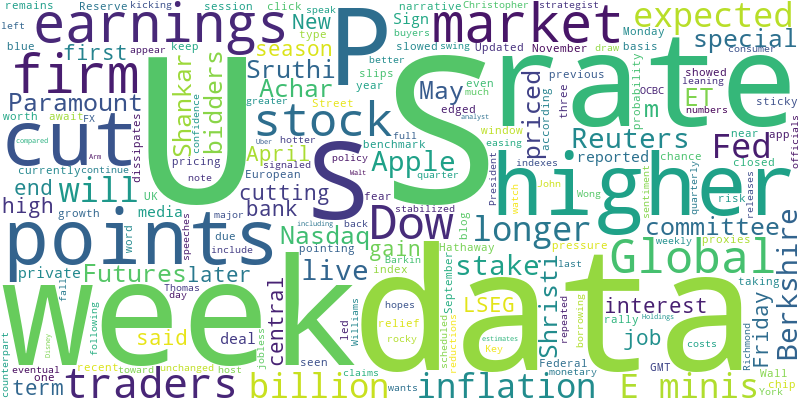

In [23]:
stock_analysis('msft')

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:9: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:10: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:11: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:22: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:23: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.

Company Introduction: Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications... [Read more]
Industry: Software - Infrastructure
Sector: Technology
Number of Employees: 221,000

  Stock Price Market Cap Earning per Share Price to Earning      Volume
0      414.74      3.08T             11.55            35.91  12,459,034


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


:Curve   [Datetime]   (Close)

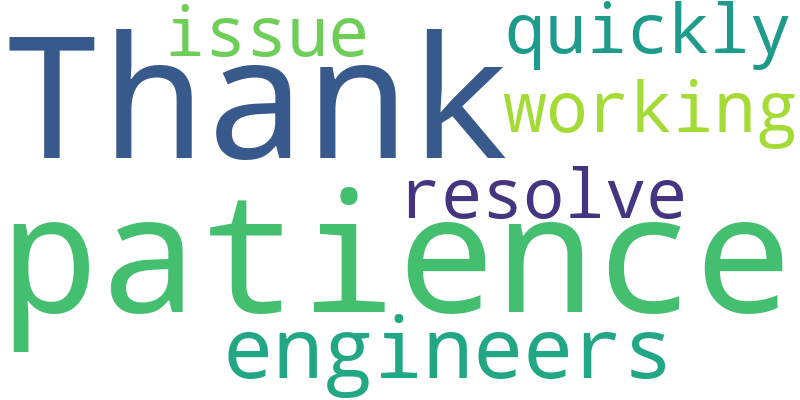

In [24]:
stock_analysis('jpm')

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:9: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:10: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:11: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:22: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.py:23: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

/var/folders/87/1g7242z16d76sf007nx90b8c0000gn/T/ipykernel_26762/2814096120.

Company Introduction: JPMorgan Chase & Co. operates as a financial services company worldwide. It operates through four segments: Consumer & Community Banking (CCB), Corporate & Investment Bank (CIB), Commercial Banking (CB), and Asset & Wealth Management (AWM). The CCB segment offers deposit, investment and lending products, cash management, and payments and services; mortgage origination and servicing activities; residential mortgages and home equity loans; and credit cards, auto loans, leases, and travel services to consumers and small businesses through bank bra... [Read more]
Industry: Banks - Diversified
Sector: Financials
Number of Employees: 309,926

  Stock Price Market Cap Earning per Share Price to Earning     Volume
0      198.77    570.80B             16.57            12.00  7,497,943


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


:Curve   [Datetime]   (Close)

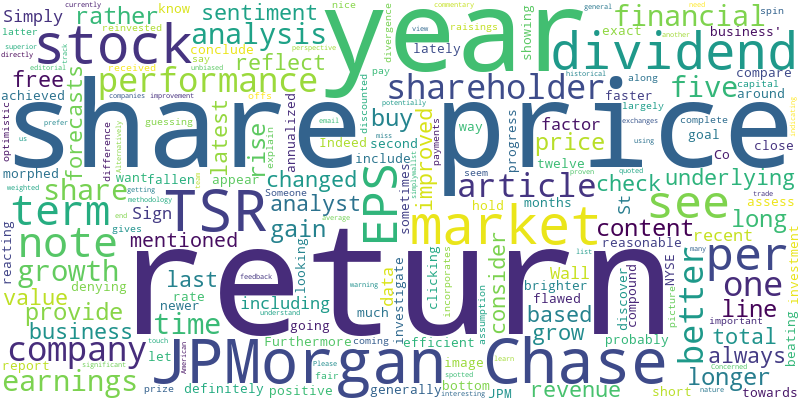

---
## Part 2 - Automated Investment Platform

Develop a Python program that takes a list of tickers and analyzes them. The automated investment platform should pick one stock to **BUY**. 

* Design an investment strategy and briefly explain that.
* The program should print out a report comparing the stocks.
* The program should pick the stock based on a logical and well-justified strategy. So you cannot randomly select a stock.

You can use any Python library for this part. First, develop an investment strategy and then convert it into a program. You should clearly explain your investment strategy and the required steps for implementation.

# Your strategy goes here
- **Positive Momentum**: We look for stocks where the short-term moving average (20-day SMA) crosses above the long-term moving average (50-day SMA). This indicates bullish momentum, suggesting that the stock price is likely to continue rising.

- **Lower Risk**: We calculate the historical volatility of each stock over the last 30 days. Lower volatility implies more stable price movements and reduced risk.
1. Percentage Change: First, we compute the daily percentage change in the stock's closing price. This is calculated as the difference between today's closing price and yesterday's closing price divided by yesterday's closing price.
2. Standard Deviation: Next, we calculate the standard deviation of these daily percentage changes. Standard deviation indicates how much the stock's price fluctuates from its average return.
3. Annualization: To annualize the volatility, we multiply the standard deviation by the square root of the number of trading days in a year to compare volatility across different timeframes and securities.
- Combining Momentum and Risk: Among stocks with positive momentum, we choose the one with the lowest volatility. This combination allows us to capitalize on upward price movements while minimizing the risk of sudden downturns.

*The financial metrics used in this platforms are*: 
1. Trailing Price-to-Earnings (P/E) Ratio: measure of a stock's valuation relative to its earnings.
2. Return on Equity (ROE): indicates a company's profitability and efficiency in generating profit from shareholders' equity.

In [25]:
#1. Fetch historical stock data for a list of tickers from Yahoo Finance over a specified date range.
def fetch_data(tickers, start_date='2023-01-01', end_date='2024-01-01'):
    return {ticker: yf.download(ticker, start=start_date, end=end_date) for ticker in tickers}

#2. Use rolling window calculations to alculate moving averages and volatility for stock data.
def calculate_metrics(df, sma_short=20, sma_long=50, vol_window=30):
    df['SMA20'] = df['Close'].rolling(window=sma_short).mean()
    df['SMA50'] = df['Close'].rolling(window=sma_long).mean()
    df['Volatility'] = df['Close'].pct_change().rolling(window=vol_window).std() * (252 ** 0.5)
    return df

#3. Analyze stocks and recommend a buy based on the lowest volatility among stocks that show a positive SMA crossover.
def analyze_buy_stocks(tickers):
    data = fetch_data(tickers)
    results = []

    #Evaluate each stock
    for ticker, df in data.items():
        df = calculate_metrics(df)
        # Check for positive SMA crossover
        if df.iloc[-1]['SMA20'] > df.iloc[-1]['SMA50']:
            #Fetch financial metrics for stocks meeting the buy criteria
            pe_ratio = yf.Ticker(ticker).info.get('trailingPE', float('inf'))
            roe = yf.Ticker(ticker).info.get('returnOnEquity', float('-inf'))
            #Save all stocks result for comparison
            results.append((ticker, df.iloc[-1]['Volatility'], pe_ratio, roe))

    #4. Data Visualization
    #Plot stock closing prices
    plt.figure(figsize=(12, 6))
    for ticker, df in data.items():
        plt.plot(df.index, df['Close'], label=ticker)
    plt.title('Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    #Plot stock volatility
    plt.figure(figsize=(12, 6))
    for ticker, df in data.items():
        plt.plot(df.index, df['Volatility'], label=f"{ticker} Volatility")
    plt.title('Stock Volatility Comparison')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()

    #5. Pick the stock with the lowest volatility among those that had a positive crossover
    best_pick = min(results, key=lambda x: x[1]) 
    df_results = pd.DataFrame(results, columns=['Ticker', 'Volatility', 'P/E Ratio', 'ROE'])
    #Reporting the results: recommended stocks to buy, their volatility, and other relevant financial metrics
    print(f"Recommended BUY: {best_pick[0]} with the lowest volatility {best_pick[1]:.2f} among qualifying stocks.")
    return df_results
    

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


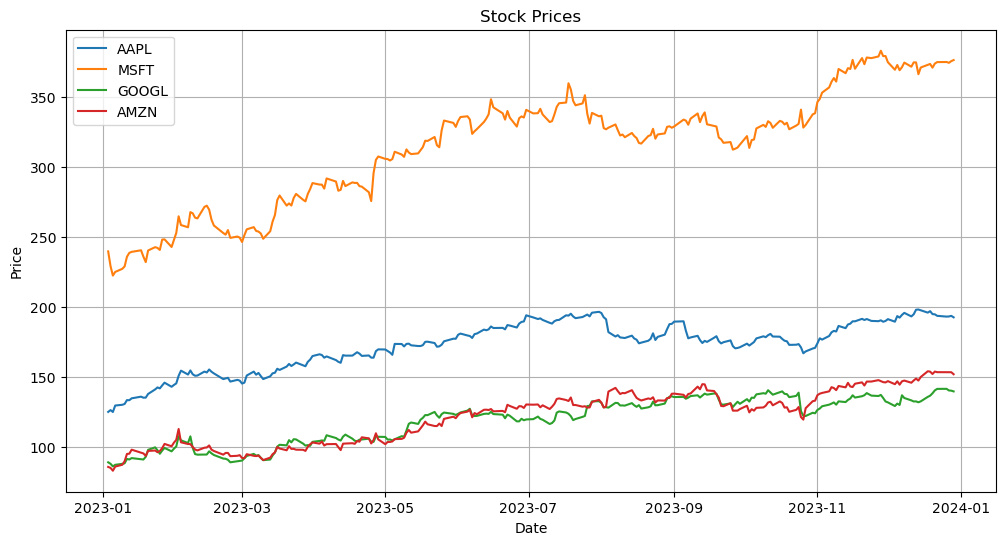

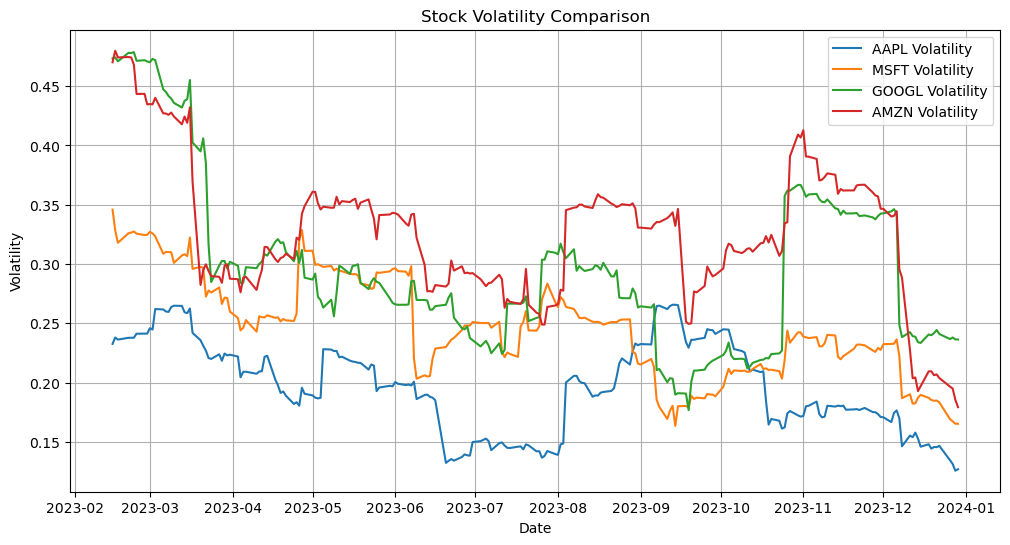

Recommended BUY: AAPL with the lowest volatility 0.13 among qualifying stocks.


,Ticker,Volatility,P/E Ratio,ROE
0,AAPL,0.126878,28.468119,1.47250
1,MSFT,0.165214,35.939342,0.38488
2,GOOGL,0.236321,25.826950,0.29764
3,AMZN,0.179253,52.662920,0.20305


In [26]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
analyze_buy_stocks(tickers)

---
## Part 3 - Automated Investment Platform

Develop a Python program that takes a portfolio (list of tickers) and analyzes them. The automated investment platform should pick one stock to **SELL**. 

* Design an investment strategy and briefly explain that.
* The program should print out a report comparing the stocks.
* The program should pick the stock based on a logical and well-justified strategy. So you cannot randomly select a stock.

You can use any Python library for this part. First, develop an investment strategy and then convert it into a program. You should clearly explain your investment strategy and the required steps for implementation.

# Your strategy goes here
**Negative Momentum** : Sell stocks where 20-day simple moving average (SMA20) falls below the 50-day simple moving average (SMA50), indicating a potential downward (bearish) trend.

**High Volatility**: Selling if the stock's volatility significantly increases, which could indicate greater risk and instability.
1. Percentage Change: First, we compute the daily percentage change in the stock's closing price. This is calculated as the difference between today's closing price and yesterday's closing price divided by yesterday's closing price.
2. Standard Deviation: Next, we calculate the standard deviation of these daily percentage changes. Standard deviation indicates how much the stock's price fluctuates from its average return.
3. Annualization: To annualize the volatility, we multiply the standard deviation by the square root of the number of trading days in a year to compare volatility across different timeframes and securities.
- Combining Momentum and Risk: Stocks with volatility exceeding historical averages are considered riskier and thus candidates for selling (Firstly, We set the condition for sell trigger that SMA20 < SMA50, then select the one with highest volatility in the list of stock that met the condition). If we could not find one that meets the selling trigger, we choose the one with the highest volatility. 

*The financial metrics used in this platforms are*: 
1. Trailing Price-to-Earnings (P/E) Ratio: measure of a stock's valuation relative to its earnings. An increasing P/E ratio might indicate overvaluation
2. Return on Equity (ROE): indicates a company's profitability and efficiency in generating profit from shareholders' equity. An decreasing ROE could suggest deteriorating efficiency.



In [27]:
#1. Fetch historical stock data for a list of tickers from Yahoo Finance over a specified date range.
def fetch_data(tickers, start_date='2023-01-01', end_date='2024-01-01'):
    return {ticker: yf.download(ticker, start=start_date, end=end_date) for ticker in tickers}

#2. Use rolling window calculations to alculate moving averages and volatility for stock data.
def calculate_metrics(df, sma_short=20, sma_long=50, vol_window=30):
    df['SMA20'] = df['Close'].rolling(window=sma_short).mean()
    df['SMA50'] = df['Close'].rolling(window=sma_long).mean()
    df['Volatility'] = df['Close'].pct_change().rolling(window=vol_window).std() * (252 ** 0.5)
    return df

#3. Analyze stocks for potential sell signals based on volatility and moving averages crossover.
#This function identifies stocks with bearish trends (SMA20 < SMA50) and high volatility for potential selling (selling signal)
def analyze_sell_stocks(tickers):
    data = fetch_data(tickers)
    results = []
    highest_volatility_stock = None
    highest_volatility = 0

    # Evaluate each stock for selling signals
    for ticker, df in data.items():
        df = calculate_metrics(df)
        current_volatility = df['Volatility'].iloc[-1]
        pe_ratio = yf.Ticker(ticker).info.get('trailingPE', float('inf'))
        roe = yf.Ticker(ticker).info.get('returnOnEquity', float('-inf'))
        #Save all stocks result for comparison
        results.append((ticker, current_volatility, pe_ratio, roe))

        #Check for bearish crossover
        if df.iloc[-1]['SMA20'] < df.iloc[-1]['SMA50'] and current_volatility > highest_volatility:
            highest_volatility = current_volatility
            highest_volatility_stock = (ticker, current_volatility, pe_ratio, roe)

        # Plot stock prices and SMAs for each stock analyzed
        plt.figure(figsize=(6, 3))
        plt.title(f"{ticker} - Stock Price and SMA")
        plt.plot(df['Close'], label='Close Price')
        plt.plot(df['SMA20'], label='20-Day SMA')
        plt.plot(df['SMA50'], label='50-Day SMA')
        plt.legend()
        plt.grid(True)
        plt.show()

    #4. Data Visualization
    #Volatility Comparison
    plt.figure(figsize=(12, 6))
    for ticker, df in data.items():
        plt.plot(df.index, df['Volatility'], label=f"{ticker} Volatility")
    plt.title('Stock Volatility Comparison')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()

    #5. We set the condition for sell trigger that SMA20<SMA50, then select the one with highest volatility in the list of stock that met the condition. 
    #If we could not find one that meets the selling trigger, we directly choose the one with the highest volatility
    if highest_volatility_stock is not None:
        worst_sell = highest_volatility_stock 
    else:
        worst_sell = max(results, key=lambda x: x[1])

    #6. Return the result
    df_results = pd.DataFrame(results, columns=['Ticker', 'Volatility', 'P/E Ratio', 'ROE'])
    print(f"Recommended SELL: {worst_sell[0]} with the highest volatility {worst_sell[1]:.2f}")
    return df_results


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


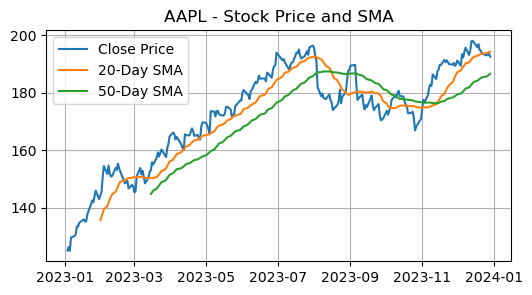

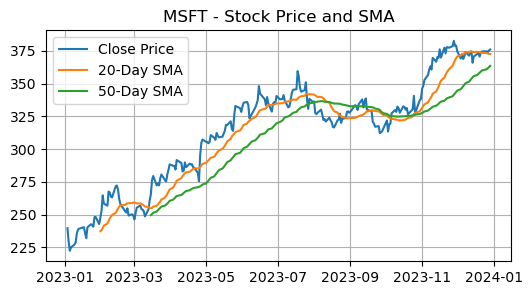

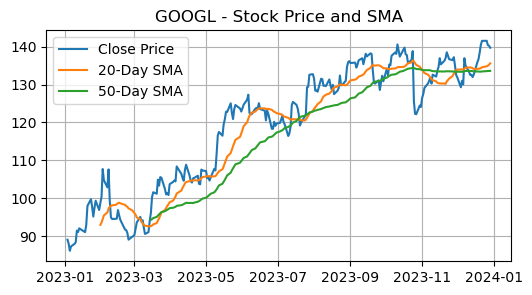

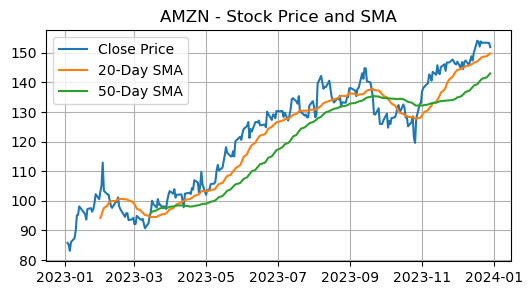

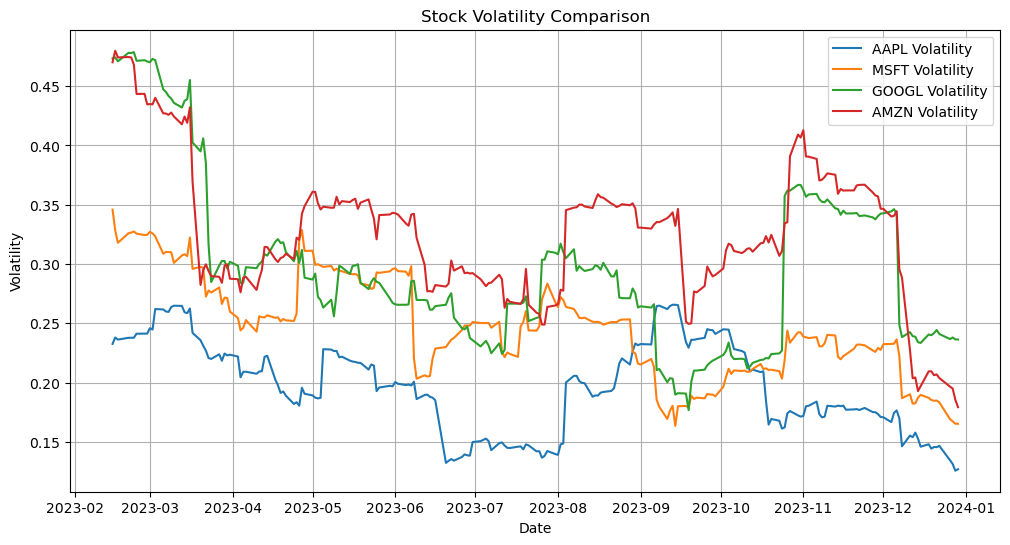

Recommended SELL: GOOGL with the highest volatility 0.24


,Ticker,Volatility,P/E Ratio,ROE
0,AAPL,0.126878,28.468119,1.47250
1,MSFT,0.165214,35.939342,0.38488
2,GOOGL,0.236321,25.826950,0.29764
3,AMZN,0.179253,52.662920,0.20305


In [28]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
analyze_sell_stocks(tickers)